In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv('homeprices MultiVariable.csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [14]:
df.fillna(df.bedrooms.mean(), inplace=True)

In [16]:
X = df.drop('price', axis=1)
X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.2,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [18]:
y = df.price
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [19]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [21]:
model.predict([[4000, 4, 5]])

C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([754910.42511076])

In [22]:
model.coef_

array([  116.66950551, 18756.28806982, -3675.75111708])

In [23]:
model.intercept_

np.float64(231586.00639409182)

In [25]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [29]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [34]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())

In [35]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [4]:
from word2number import w2n
df.experince = df.experience.apply(lambda x : w2n.word_to_num(x))

In [49]:
X = df.drop('salary($)', axis=1)
X

,experience,test_score(out of 10),interview_score(out of 10)
0,zero,8.0,9
1,zero,8.0,6
2,five,6.0,7
3,two,10.0,10
4,seven,9.0,6
5,three,7.0,10
6,ten,8.0,7
7,eleven,7.0,8


In [50]:
y = df['salary($)']

In [52]:
model = LinearRegression()
model.fit(X, y)

epoch: 0, cost: 108.0, m_curr: 0.68, b_curr: 0.2
epoch: 1, cost: 63.70239999999999, m_curr: 1.1984000000000001, b_curr: 0.3552
epoch: 2, cost: 37.88278527999999, m_curr: 1.5934400000000002, b_curr: 0.476192
epoch: 3, cost: 22.831260473343992, m_curr: 1.8943116800000002, b_curr: 0.57106176
epoch: 4, cost: 14.054880016379085, m_curr: 2.1232994048, b_curr: 0.6459818239999999
epoch: 5, cost: 8.935377431667655, m_curr: 2.297414626304, b_curr: 0.705664223232
epoch: 6, cost: 5.946956405624536, m_curr: 2.4296435551232, b_curr: 0.75370606118912
epoch: 7, cost: 4.200458153134568, m_curr: 2.5298996093247488, b_curr: 0.7928533266579456
epoch: 8, cost: 3.177724724410007, m_curr: 2.6057504956738273, b_curr: 0.8252022835653018
epoch: 9, cost: 2.576799091012216, m_curr: 2.6629732496116674, b_curr: 0.8523532081535661
epoch: 10, cost: 2.2217154196073245, m_curr: 2.7059779422078867, b_curr: 0.8755277490137947
epoch: 11, cost: 2.0099293094864, m_curr: 2.738131129981324, b_curr: 0.8956585175010456
epoch: 1

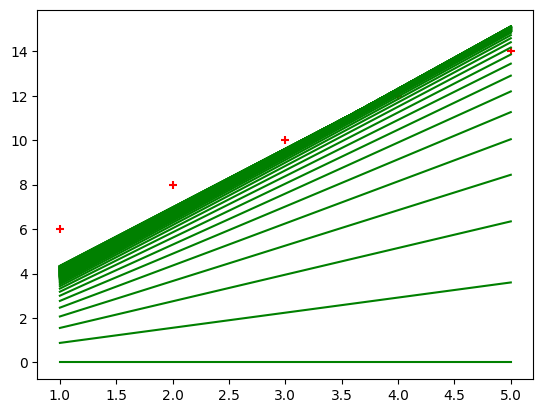

In [17]:
# Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

def grad_desc(x,y):
    m_curr = 0
    b_curr = 0
    learning_rate = 0.01
    iteration = 100
    n = len(x)
    plt.scatter(x, y, color='red', marker='+')

    for i in range(iteration):
        y_pred = x*m_curr + b_curr
        cost_func = (1/n)*sum(val**2 for val in (y-y_pred))
        plt.plot(x,y_pred, color='green')

        md = (-2/n)*sum(x*(y-y_pred))
        bd = (-2/n)*sum(y-y_pred)

        m_curr = m_curr - learning_rate*md
        b_curr = b_curr - learning_rate*bd

        print(f'epoch: {i}, cost: {cost_func}, m_curr: {m_curr}, b_curr: {b_curr}')

x = np.array([1,2,3,4,5])
y = np.array([6,8,10,12,14])
grad_desc(x,y)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

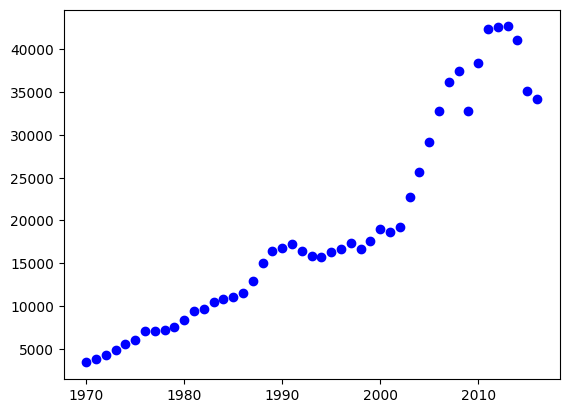

In [27]:
df = pd.read_csv('canada_per_capita_income.csv')
model = LinearRegression()
plt.scatter(df.year, df['per capita income (US$)'], color='blue')
X = df.drop('per capita income (US$)', axis=1)
y = df['per capita income (US$)']

In [28]:
model.fit(X, y)
model.predict([[2020]])

C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [29]:
import pickle

In [32]:
with open('model_pick', 'wb') as f:
    pickle.dump(model, f)

In [33]:
with open('model_pick', 'rb') as f:
    mod = pickle.load(f)

In [34]:
mod.predict([[2020]])

C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [35]:
import joblib

In [38]:
joblib.dump(model, "helllllllo")

['helllllllo']

In [39]:
mj = joblib.load('helllllllo')

In [40]:
mj.predict([[2020]])

C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [61]:
import pandas as pd

df = pd.read_csv('homeprices dummy.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [62]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [63]:
dummies.drop('monroe township', axis=1, inplace=True)
dummies

,robinsville,west windsor
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,True
6,False,True
7,False,True
8,False,True
9,True,False


In [64]:
merged = pd.concat([df, dummies], axis='columns')
merged

,town,area,price,robinsville,west windsor
0,monroe township,2600,550000,False,False
1,monroe township,3000,565000,False,False
2,monroe township,3200,610000,False,False
3,monroe township,3600,680000,False,False
4,monroe township,4000,725000,False,False
5,west windsor,2600,585000,False,True
6,west windsor,2800,615000,False,True
7,west windsor,3300,650000,False,True
8,west windsor,3600,710000,False,True
9,robinsville,2600,575000,True,False


In [67]:
X = merged.drop(['price','town'], axis=1)
y = df.price
X

,area,robinsville,west windsor
0,2600,False,False
1,3000,False,False
2,3200,False,False
3,3600,False,False
4,4000,False,False
5,2600,False,True
6,2800,False,True
7,3300,False,True
8,3600,False,True
9,2600,True,False


In [68]:
model.fit(X, y)

LinearRegression()

In [70]:
model.predict([[3000, 0, 1]])

C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([630482.69189422])

In [60]:
merged

,town,area,price,robinsville,west windsor
0,monroe township,2600,550000,False,False
1,monroe township,3000,565000,False,False
2,monroe township,3200,610000,False,False
3,monroe township,3600,680000,False,False
4,monroe township,4000,725000,False,False
5,west windsor,2600,585000,False,True
6,west windsor,2800,615000,False,True
7,west windsor,3300,650000,False,True
8,west windsor,3600,710000,False,True
9,robinsville,2600,575000,True,False
